___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np
from sklearn.metrics import average_precision_score
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
# so here we import read_csv to read our file 
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")
# and this is where I combine the datasets for men and women into dataframes.
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# we create a copy dataframe for manipulating 
df_copy = df.copy()

In [6]:
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date  \
0                     71               319  ...    Male   4-Oct-10   
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

In [7]:
# so as we see the height and weight are repeated and we wana to Convert the unit to get a great insight 
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0         0  10027.000                             266            1467   
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date  \
0                     71               319  ...    Male   4-Oct-10   
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

## Explore Data

In [8]:
# we use describe method to demonstrate the computing statistical analysis
df_copy.describe()

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
count 6068.000   4082.000                        6068.000        6068.000   
mean  1697.499  20003.371                         246.469        1406.161   
std   1133.004   6568.435                          37.400          79.091   
min      0.000  10027.000                         155.000        1115.000   
25%    758.000  14270.250                         219.000        1350.000   
50%   1516.500  17236.500                         242.000        1410.000   
75%   2564.250  27315.750                         271.000        1462.000   
max   4081.000  29452.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               6068.000            6068.000      6068.000   
mean                 327.374             224.891      1299.609   
std                   20.720              16.052        72.022   
min                  249.000             156.000      1038.000   
25%                  313.000             214.000      1249.000   
50%                  328.000             225.000      1302.000   
75%                  341.250             235.000      1349.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 6068.000          6068.000           6068.000   
mean                   244.193           194.755            399.204   
std                     16.845            13.516             30.237   
min                    186.000           151.000            283.000   
25%                    232.000           185.000            376.000   
50%                    245.000           195.000            404.000   
75%                    256.000           204.000            421.000   
max                    306.000           245.000            489.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   6068.000          6068.000          6068.000   
mean                     340.934           274.735           490.754   
std                       41.520            19.221            42.136   
min                      216.000           197.000           357.000   
25%                      311.000           262.000           460.000   
50%                      341.000           274.000           492.000   
75%                      370.000           288.000           520.000   
max                      490.000           362.000           637.000   

       bimalleolarbreadth  bitragionchinarc  ...  waistbacklength  \
count            6068.000          6068.000  ...         6068.000   
mean               72.253           324.897  ...          460.525   
std                 5.345            17.088  ...           36.678   
min                55.000           267.000  ...          345.000   
25%                68.000           314.000  ...          435.000   
50%                72.000           326.000  ...          463.000   
75%                76.000           336.000  ...          486.000   
max                91.000           385.000  ...          598.000   

       waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  \
count      6068.000            6068.000    6068.000                 6068.000   
mean        317.750             914.501     229.674                  377.004   
std          36.363             114.275      35.613                   31.618   
min         211.000             611.000     138.000                  289.000   
25%         292.000             829.000     203.000                  355.000   
50%         316.000             907.000     226.000                  375.000   
75%         343.000             992.000     252.250                  398.000   
max         461.000            1379.000     406.000                  494.000   

       waistheightomphalion  weightkg  wristcircumference  wristheight  \
count         

In [9]:
df_copy.describe(include="O").T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [10]:
df_copy["WritingPreference"].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [11]:
df_copy["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [12]:
# so after i investigated the data in deapth I choose the feature that I want to remove, such as Ethnicity because more than 50% of them are missing 
# SubjectNumericRace It might confuse us since it's similar to the target
# PrimaryMOS because they possess numerous unique values and I dropped the ID number as it served no purpose also Weightlbs, Heightin, and so forth.
df_copy = df_copy.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "subjectid",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)


In [13]:
# Select DODRace that has more than 500 observations.
df_copy.groupby("DODRace").count()

abdominalextensiondepthsitting  acromialheight  \
DODRace                                                   
1                                  3792            3792   
2                                  1298            1298   
3                                   679             679   
4                                   188             188   
5                                    49              49   
6                                    59              59   
8                                     3               3   

         acromionradialelength  anklecircumference  axillaheight  \
DODRace                                                            
1                         3792                3792          3792   
2                         1298                1298          1298   
3                          679                 679           679   
4                          188                 188           188   
5                           49                  49            49   
6                           59                  59            59   
8                            3                   3             3   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
DODRace                                                                 
1                           3792              3792               3792   
2                           1298              1298               1298   
3                            679               679                679   
4                            188               188                188   
5                             49                49                 49   
6                             59                59                 59   
8                              3                 3                  3   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
DODRace                                                                  
1                             3792              3792              3792   
2                             1298              1298              1298   
3                              679               679               679   
4                              188               188               188   
5                               49                49                49   
6                               59                59                59   
8                                3                 3                 3   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
DODRace                                                                    
1                      3792              3792                       3792   
2                      1298              1298                       1298   
3                       679               679                        679   
4                       188               188                        188   
5                        49                49                         49   
6                        59                59                         59   
8                         3                 3                          3   

         bizygomaticbreadth  ...  trochanterionheight  \
DODRace                      ...                        
1                      3792  ...                 3792   
2                      1298  ...                 1298   
3                       679  ...                  679   
4                       188  ...                  188   
5                        49  ...                   49   
6                        59  ...                   59   
8                         3  ...                    3   

         verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
DODRace                                                                 
1                                 3792             3792          3792   
2                                 1298             1298          1298   
3                                  679          

In [15]:
# Only DODRace that has more than 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  ...  \
0                  319                        291                 142  ...   
1                  344                        320                 135  ...   
2                  345                        330                 135  ...   
3                  328                        309                 143  ...   
4                  340                        310                 138  ...   
...                ...                        ...                 ...  ...   
6063               306                        282                 136  .

In [16]:
#therefore, we map our target class to 1, 2, and 3 here.
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [17]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [18]:
df_copy.isnull().sum()


0

In [20]:
# Here, we'll look for duplicates.
df.duplicated().sum()

0

In [21]:
# show the correlation matrix in a dataframe format.
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix

def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

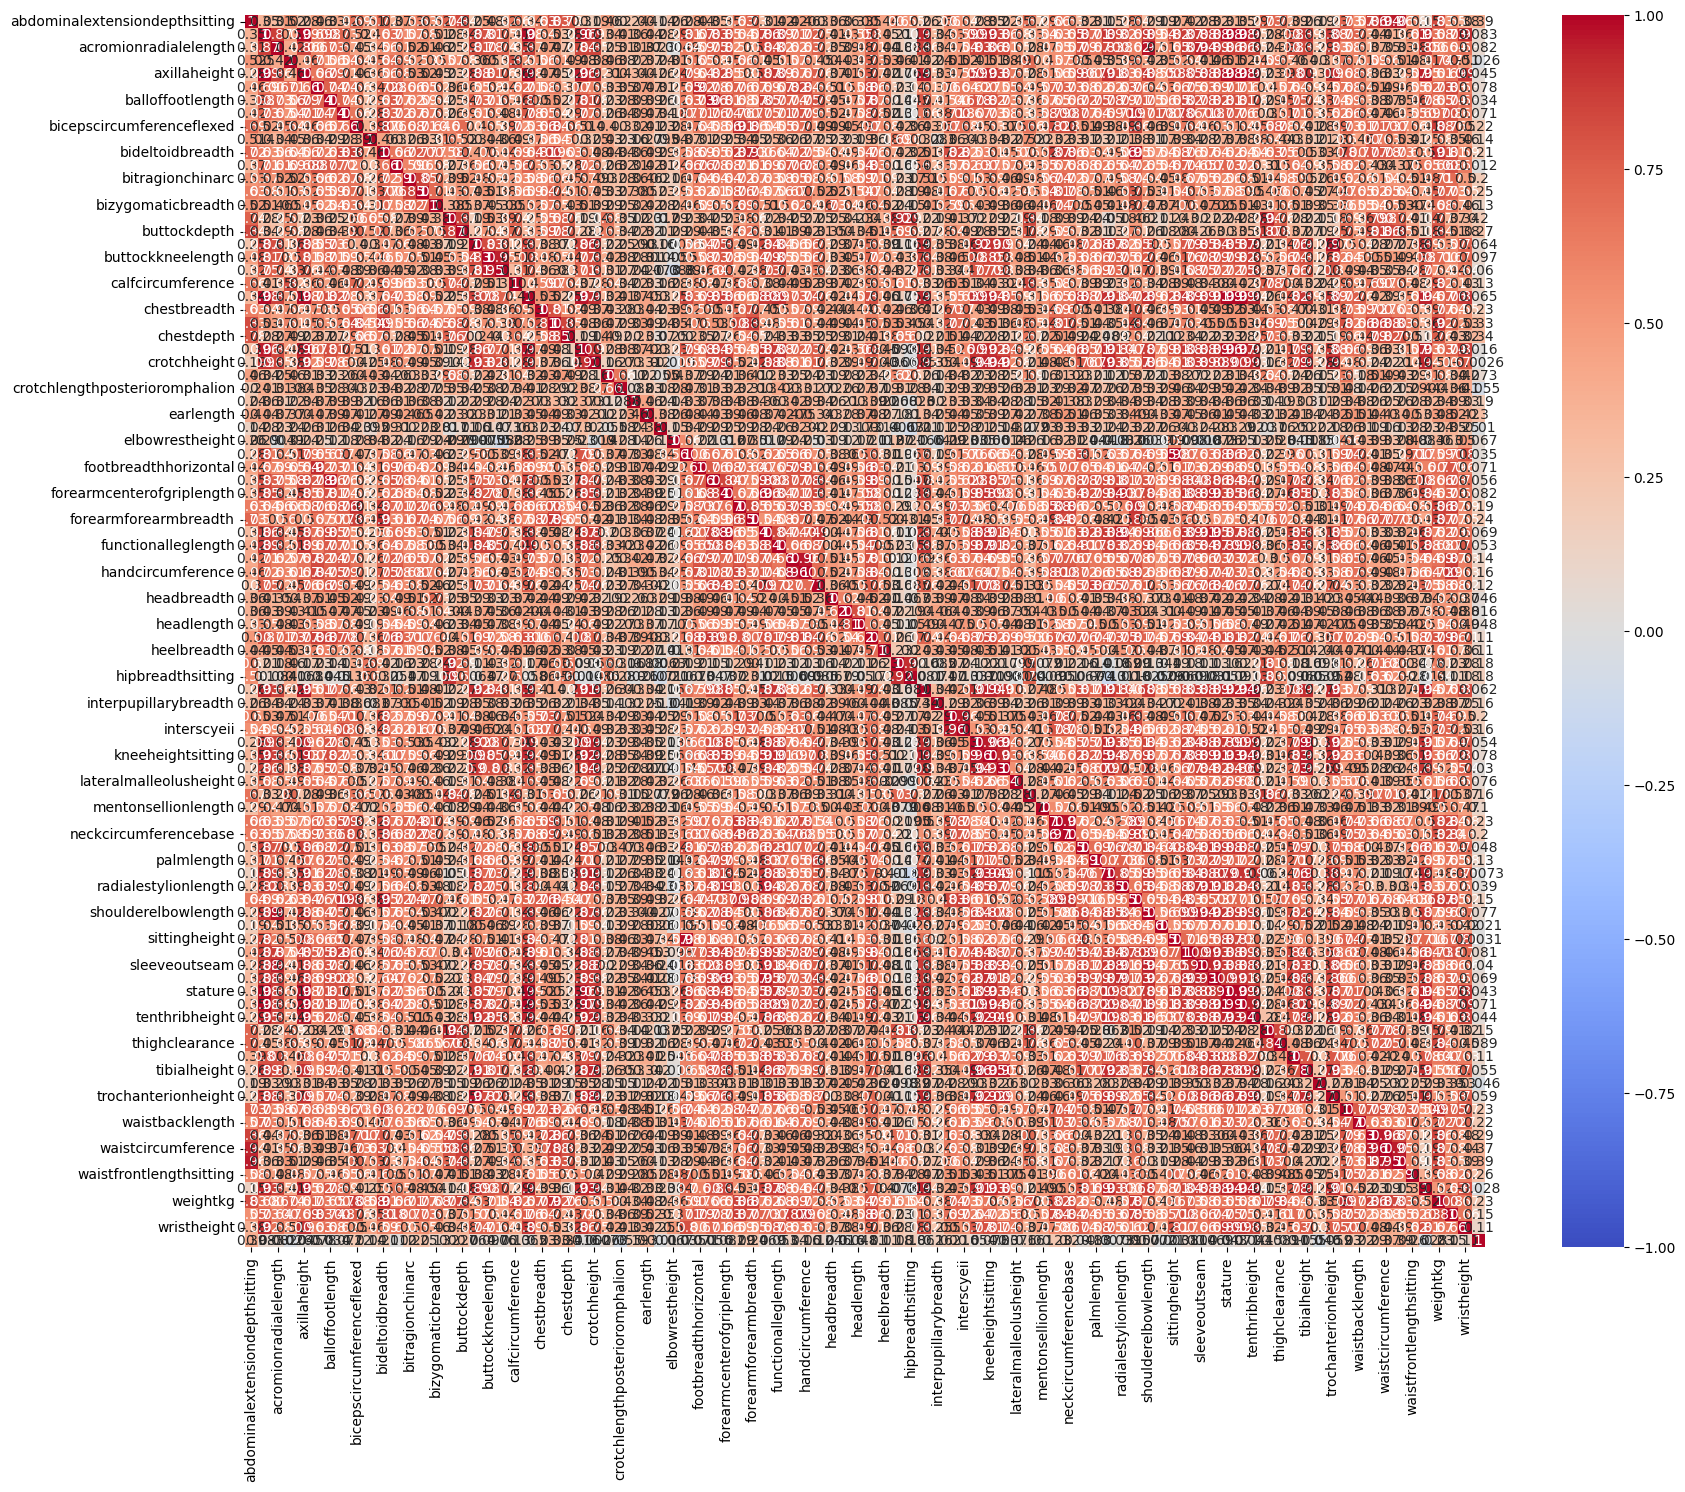

In [108]:

plt.figure(figsize=(20,16))
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");


In [109]:
df_copy.corr(numeric_only=True)[(abs(df_copy.corr(numeric_only=True))>= 0.9) & (abs(df_copy.corr(numeric_only=True)) < 1)] .any().any()

True

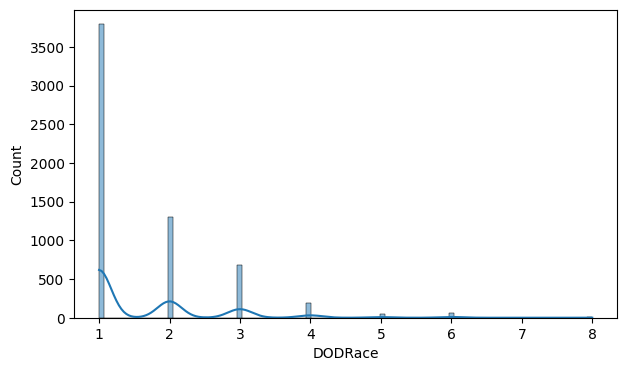

In [110]:
sns.histplot(df.DODRace, bins=100, kde=True);

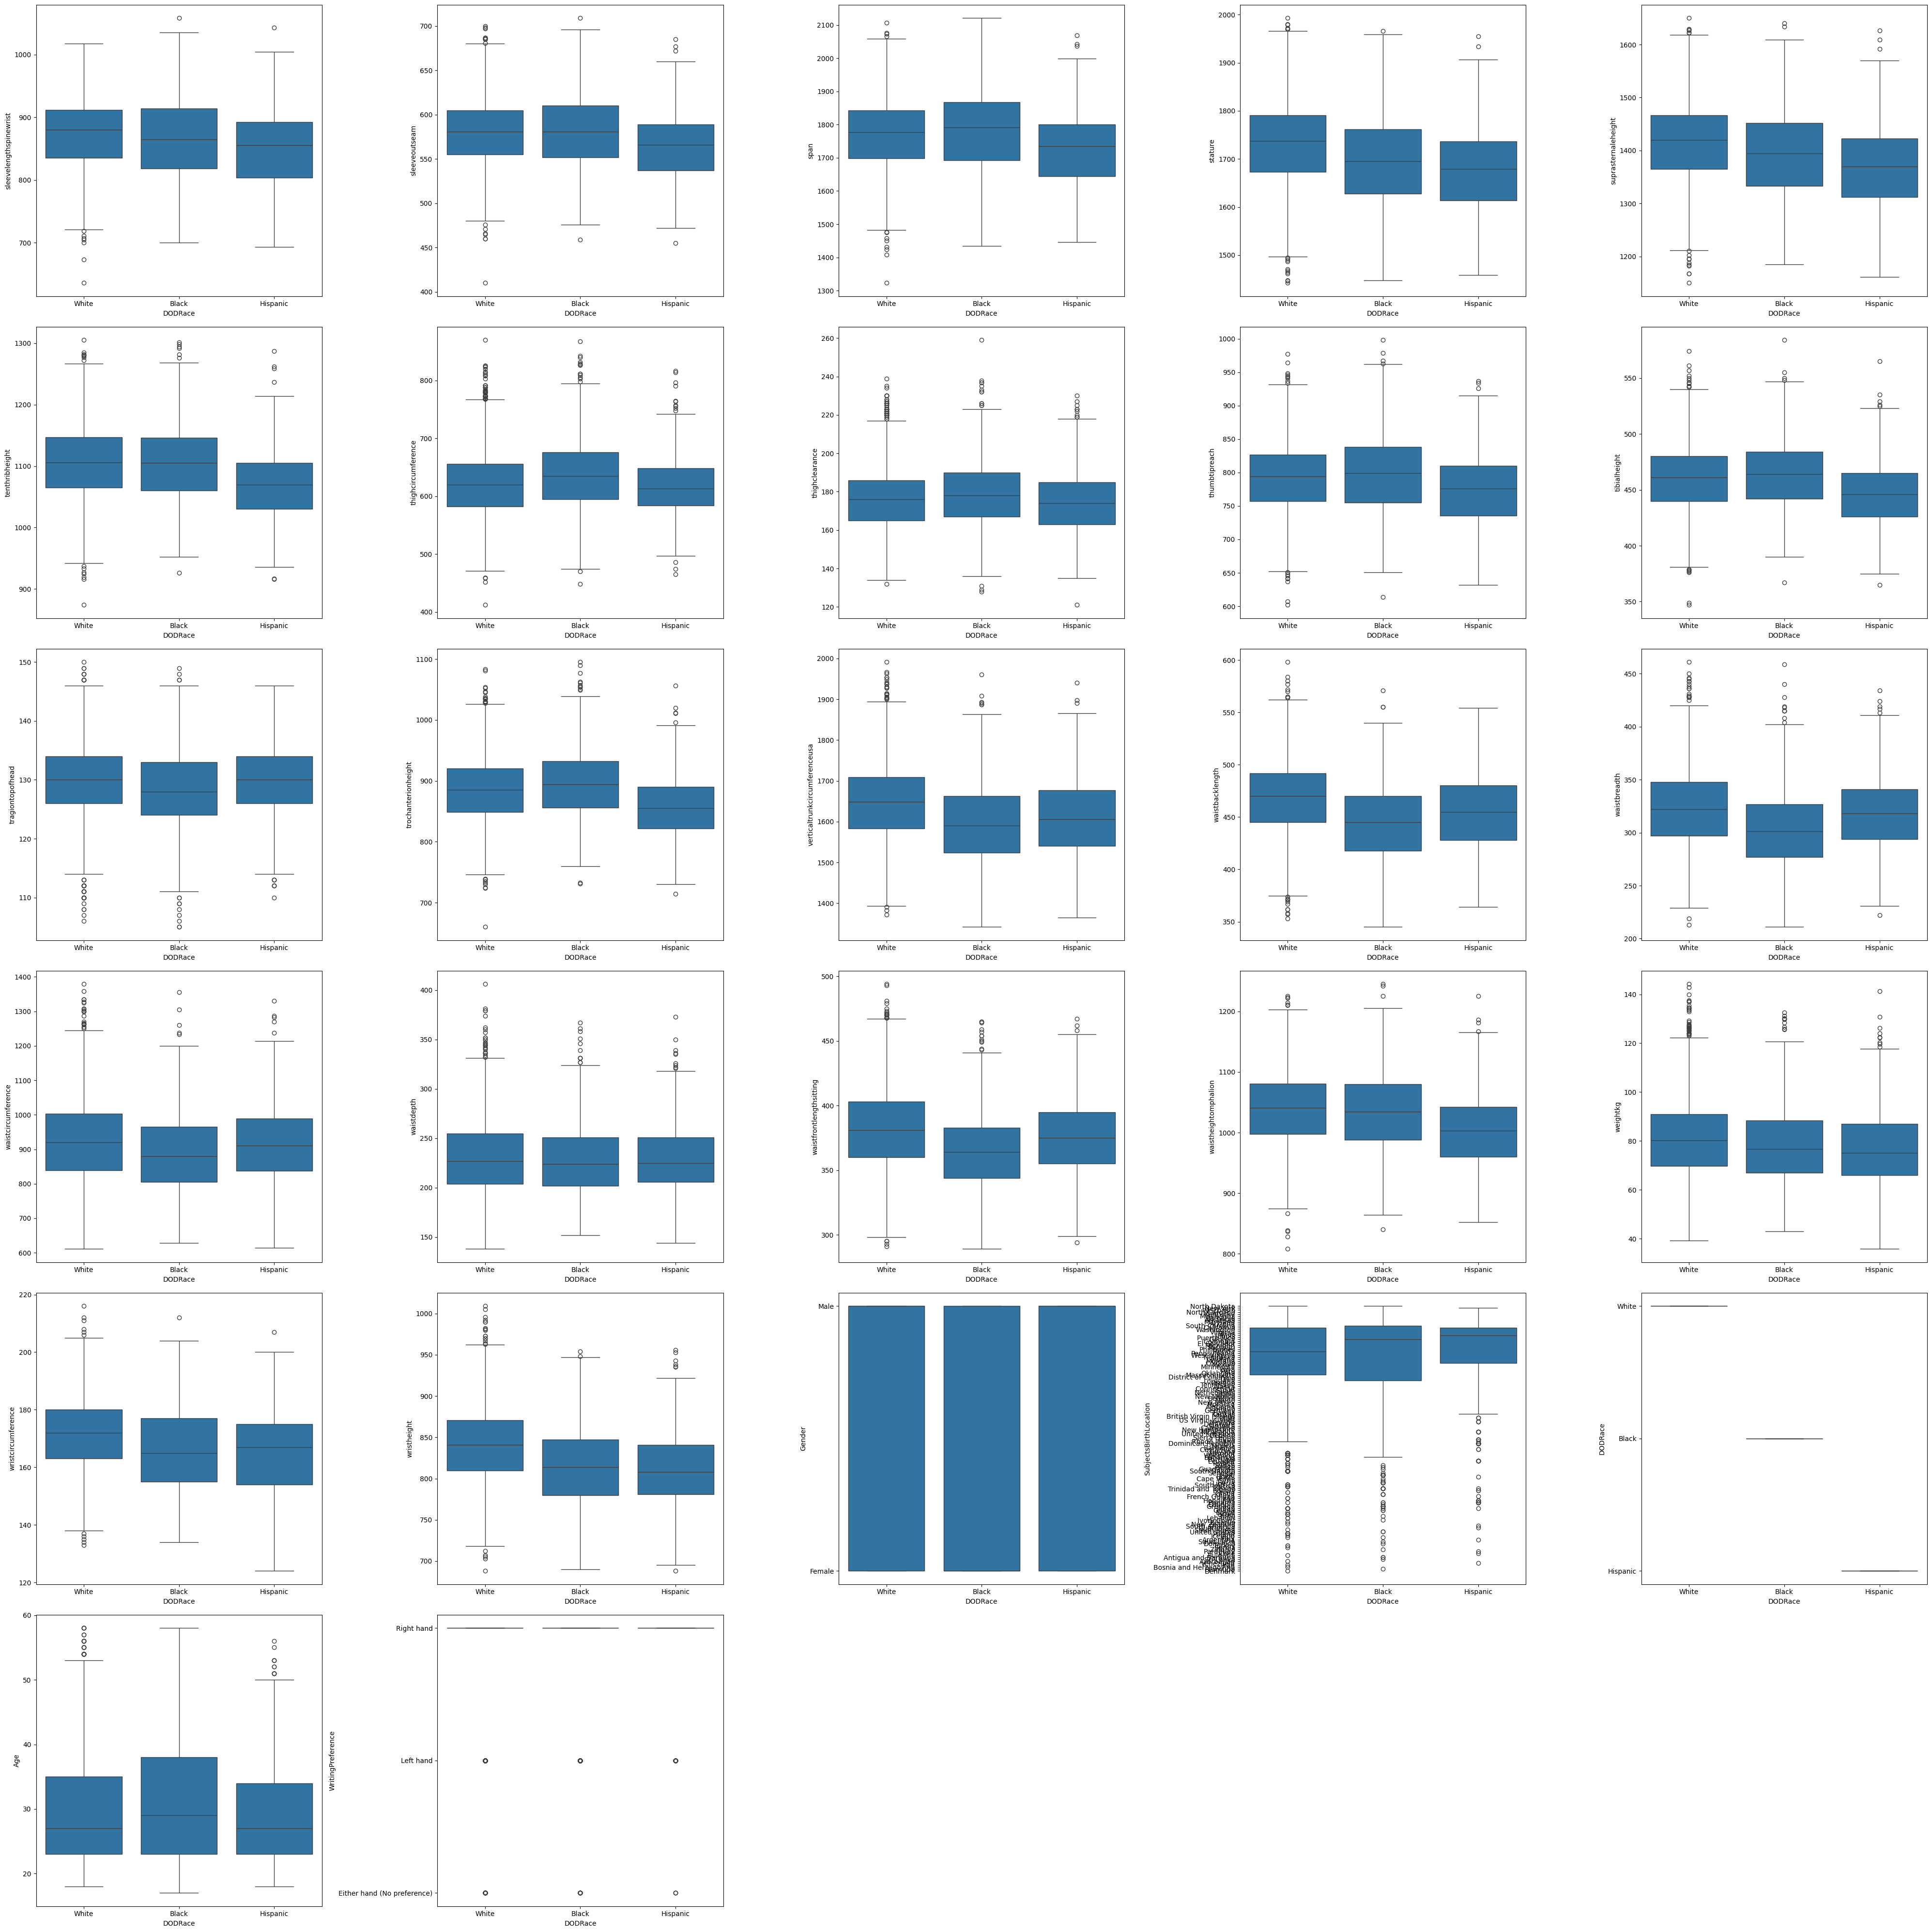

In [111]:
fig = plt.figure(figsize=(40, 40))

for i, col in enumerate(df_copy.columns[71:100]):
        plt.subplot(6, 5,i+1)
        ax = sns.boxplot(x="DODRace", y=df_copy[col], data=df_copy)
        
plt.tight_layout();

In [23]:
df_copy.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: float64(1), int64(93), object(4)
memory usage: 4.4+ MB



buttockheight
buttockkneelength
buttockpopliteallength
cervicaleheight
chestbreadth
chestheight
crotchheight
earlength
earprotrusion
elbowrestheight
eyeheightsitting
forearmcenterofgriplength
forearmforearmbreadth
forearmhandlength
handbreadth
handlength
headbreadth
headcircumference
headlength
heelbreadth
iliocristaleheight
interscyei
interscyeii
kneeheightmidpatella
kneeheightsitting 
lateralfemoralepicondyleheight
lateralmalleolusheight
neckcircumference
neckcircumferencebase
overheadfingertipreachsitting
palmlength
poplitealheight
radialestylionlength
shoulderelbowlength
sittingheight
sleevelengthspinewrist
sleeveoutseam
span
stature
suprasternaleheight
tenthribheight
thighcircumference
thighclearance
thumbtipreach
tibialheight  
tragiontopofhead                                  
trochanterionheight
verticaltrunkcircumferenceusa
waistbacklength
waistbreadth
waistcircumference
waistfrontlengthsitting 
waistheightomphalion
wristcircumference
wristheight
SubjectsBirthLocation
Age
Gender
                          
selected_columns = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength', 
                    'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight', '']
selected_df = df[selected_columns]

In [24]:
df_copy.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [35]:
#Nominal category features are encoded.
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [43]:
# Divide the data into train and test.
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [39]:

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [46]:
df_copy2 = df_copy.copy()
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [42]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

### Vanilla XGBoost Model

In [48]:
xgb_classifier = XGBClassifier()
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [49]:

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [50]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Cross validation XGBoost Model

In [51]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [52]:

xgb_classifier = XGBClassifier()
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)



scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   0.801
score_time                 0.026
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

In [53]:

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [54]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [55]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [56]:

pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   0.829
score_time                 0.028
test_f1_hispanic           0.439
train_f1_hispanic          1.000
test_precision_hispanic    0.746
train_precision_hispanic   1.000
test_recall_hispanic       0.311
train_recall_hispanic      1.000
dtype: float64

#### GridSearch XGBoost Model

In [57]:
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}



In [58]:

pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      cal...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [59]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [60]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.361
mean_train_score   0.715
Name: 193, dtype: object

In [61]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[227   5  28]
 [  8  51  77]
 [  8  12 738]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       260
           1       0.75      0.38      0.50       136
           2       0.88      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.74      0.77      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[ 987    2   49]
 [  23  353  167]
 [   6   11 3017]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1038
           1       0.96      0.65      0.78       543
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.96      0.87      0.90      4615
weighted avg       0.95      0.94      0.94      4615



#### Random Serach

In [62]:

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),     
    "xgboost__max_depth":np.arange(3,11, step=1),                 
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            
    "xgboost__gamma": np.arange(0, 11,step=0.5),               
}

xgb_classifier = XGBClassifier()
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])

random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

random_search.fit(X_train, y_train)



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=188, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=188, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=188, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=188, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [63]:
print(random_search.best_params_)


{'xgboost__subsample': 0.7, 'xgboost__reg_alpha': 0.2, 'xgboost__n_estimators': 137, 'xgboost__max_depth': 3, 'xgboost__learning_rate': 1.1609999999999998, 'xgboost__gamma': 1.5, 'xgboost__colsample_bytree': 0.7}


In [64]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.424
mean_train_score   0.914
Name: 592, dtype: object

In [65]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[228  12  20]
 [ 12  57  67]
 [ 17  40 701]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       260
           1       0.52      0.42      0.47       136
           2       0.89      0.92      0.91       758

    accuracy                           0.85      1154
   macro avg       0.77      0.74      0.75      1154
weighted avg       0.85      0.85      0.85      1154


Train_Set
[[1028    1    9]
 [   5  489   49]
 [   7    3 3024]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1038
           1       0.99      0.90      0.94       543
           2       0.98      1.00      0.99      3034

    accuracy                           0.98      4615
   macro avg       0.99      0.96      0.97      4615
weighted avg       0.98      0.98      0.98      4615



---
---

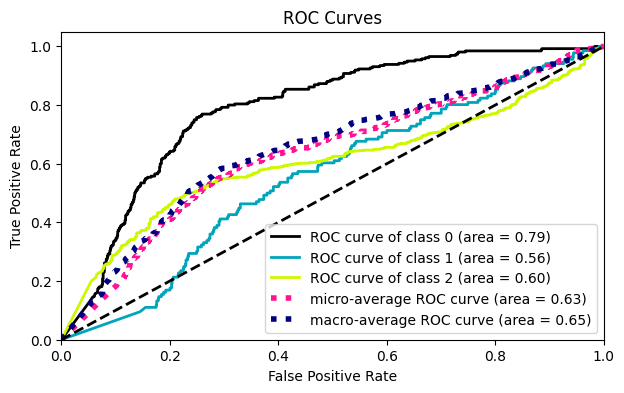

In [99]:
import scikitplot as skplt

# Get the best estimator from the Random searchCV
best_model = random_search.best_estimator_

# Calculate predicted probabilities for the test data
y_pred_proba = best_model.predict_proba(X_test)

# Plot the ROC curve
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [100]:
y_test_dummies = pd.get_dummies(y_test).values

In [103]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.1277330684452527

In [105]:
y_pred = grid_search.predict(X_test)

xgrid_search_f1 = f1_score(y_test, y_pred, average=None, labels=[1])
xxgrid_search_recall = recall_score(y_test, y_pred, average=None, labels=[1])

## Comparing Models

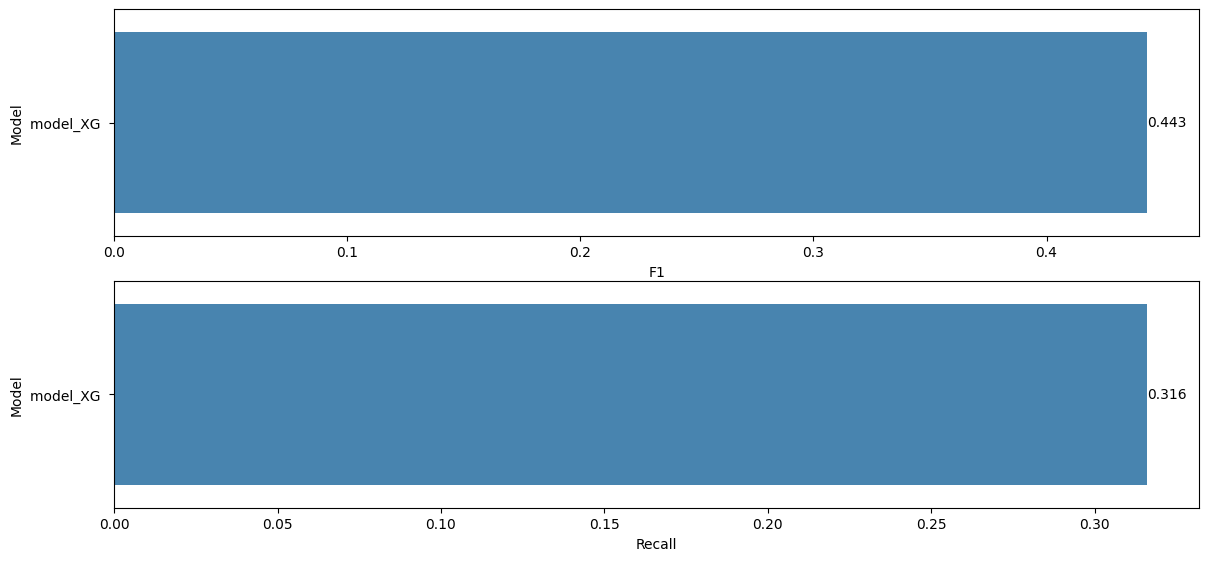

In [107]:
compare = pd.DataFrame(
    {
        "Model": ["model_XG "],
        "F1": [xgrid_search_f1[0]],
        "Recall": [xxgrid_search_recall[0]],
        
    }
)

plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show()